In [1]:
import matplotlib.pyplot as plt
import numpy as np
from joblib import Parallel, delayed

import sys
sys.path.insert(0, '../code/')
from k_armed_bandit import KArmedBandit

%matplotlib inline 
%load_ext autoreload
%autoreload 2

# Exercise 2.5

Design and conduct an experiment to demonstrate the difficulties that sample-average methods have for nonstationary problems. Use a modified version of the 10-armed testbed in which all the $q_*(a)$ start out equal and then take independent random walks (say by adding a normally distributed increment with mean zero and standard deviation 0.01 to all the $q_*(a)$ on each step). Prepare plots like Figure 2.2 for an action-value method using sample averages, incrementally computed, and another action-value method using a constant step-size parameter, $\alpha = 0.1$. Use $\epsilon = 0.1$ and longer runs, say of 10,000 steps.

In [2]:
n_jobs=3
verbose=0
alpha="1/n"
epsilons=[0.1]
runs=2000
epochs=10000
k_arms=10
init_deterministic=True
increment_mu=0
increment_sigma=0.01
def run(k_arms, runs, epochs, alpha, epsilons, init_deterministic, 
        increment_mu, increment_sigma, n_jobs=4, verbose=1):
    
    results = {}
    for i, epsilon in enumerate(epsilons):
        print("{}".format(i))
        list_of_runs = Parallel(n_jobs=n_jobs, verbose=verbose)(
            delayed(KArmedBandit(k_arms=k_arms, 
                                 alpha=alpha,
                                 epsilon=epsilon,
                                 prior_estimation=0., 
                                 true_reward=0.,
                                 init_deterministic=init_deterministic,
                                 increment_mu=increment_mu,
                                 increment_sigma=increment_sigma).simulate)(epochs=epochs)
            for _ in range(runs))
        #compute avg rewards
        results[epsilon] = np.array(list_of_runs)
    return results

results =  run(k_arms=k_arms, runs=runs, epochs=epochs, alpha=alpha, epsilons=epsilons, 
               init_deterministic=init_deterministic, increment_mu=increment_mu, 
               increment_sigma=increment_sigma, n_jobs=n_jobs, verbose=verbose)

0


### Run experiments using sample averaging

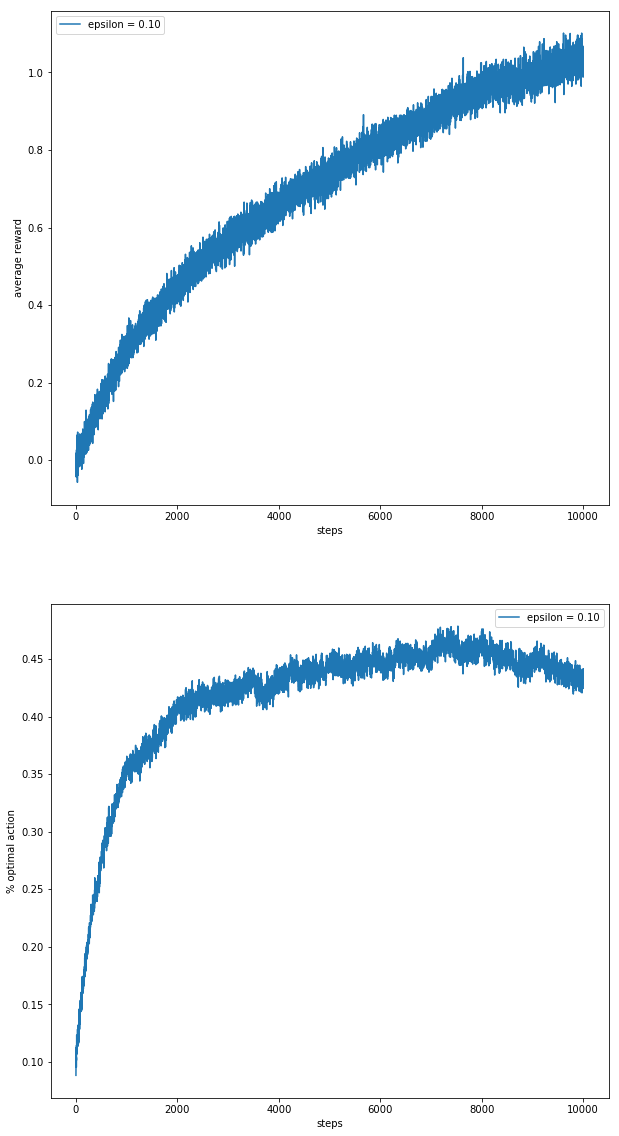

In [3]:
plt.figure(figsize=(10, 20))

plt.subplot(2, 1, 1)
for epsilon in epsilons:
    rewards = results.get(epsilon)[:,:,0].mean(axis=0)
    plt.plot(rewards, label='epsilon = %.02f' % (epsilon))
plt.xlabel('steps')
plt.ylabel('average reward')
plt.legend()

plt.subplot(2, 1, 2)
for epsilon in epsilons:
    best_action_counts = results.get(epsilon)[:,:,1].mean(axis=0)
    plt.plot(best_action_counts, label='epsilon = %.02f' % (epsilon))
plt.xlabel('steps')
plt.ylabel('% optimal action')
plt.legend()

### Run experiments using constant step-size of 0.1

In [4]:
n_jobs=12
verbose=0
alpha=0.1
epsilons=[0.1]
runs=2000
epochs=10000
k_arms=10
init_deterministic=True
increment_mu=0
increment_sigma=0.01
def run(k_arms, runs, epochs, alpha, epsilons, init_deterministic, 
        increment_mu, increment_sigma, n_jobs=4, verbose=1):
    
    results = {}
    for i, epsilon in enumerate(epsilons):
        print("{}".format(i))
        list_of_runs = Parallel(n_jobs=n_jobs, verbose=verbose)(
            delayed(KArmedBandit(k_arms=k_arms, 
                                 alpha=alpha,
                                 epsilon=epsilon,
                                 prior_estimation=0., 
                                 true_reward=0.,
                                 init_deterministic=init_deterministic,
                                 increment_mu=increment_mu,
                                 increment_sigma=increment_sigma).simulate)(epochs=epochs)
            for _ in range(runs))
        #compute avg rewards
        results[epsilon] = np.array(list_of_runs)
    return results

results =  run(k_arms=k_arms, runs=runs, epochs=epochs, alpha=alpha, epsilons=epsilons, 
               init_deterministic=init_deterministic, increment_mu=increment_mu, 
               increment_sigma=increment_sigma, n_jobs=n_jobs, verbose=verbose)

0


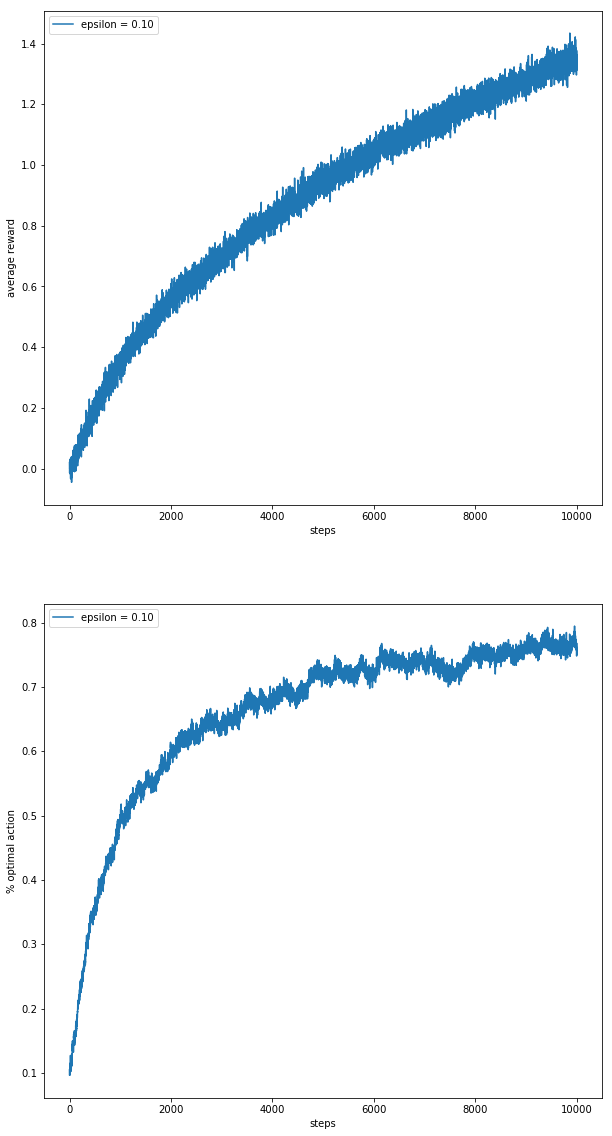

In [5]:
plt.figure(figsize=(10, 20))

plt.subplot(2, 1, 1)
for epsilon in epsilons:
    rewards = results.get(epsilon)[:,:,0].mean(axis=0)
    plt.plot(rewards, label='epsilon = %.02f' % (epsilon))
plt.xlabel('steps')
plt.ylabel('average reward')
plt.legend()

plt.subplot(2, 1, 2)
for epsilon in epsilons:
    best_action_counts = results.get(epsilon)[:,:,1].mean(axis=0)
    plt.plot(best_action_counts, label='epsilon = %.02f' % (epsilon))
plt.xlabel('steps')
plt.ylabel('% optimal action')
plt.legend()

## Testing Gradient Bandit Algorithms
Figure 2.5

In [2]:
n_jobs=3
verbose=0
runs=2000
epochs=1000
k_arms=10

def run_bandit(bandit,epochs=10000,  runs=2000, n_jobs=4, verbose=1):
    
    list_of_runs = Parallel(n_jobs=n_jobs, verbose=verbose)(
        delayed(bandit.simulate)(epochs=epochs)
        for _ in range(runs))
    return np.array(list_of_runs)



b1= KArmedBandit(k_arms=k_arms, use_gradient=True, use_baseline_gradient=True, alpha=0.1,  true_reward=4)
results_b1 =  run_bandit(bandit=b1,epochs=epochs, runs=runs, n_jobs=n_jobs, verbose=verbose)

b2= KArmedBandit(k_arms=k_arms, use_gradient=True, use_baseline_gradient=True, alpha=0.4,  true_reward=4)
results_b2 =  run_bandit(bandit=b2,epochs=epochs, runs=runs, n_jobs=n_jobs, verbose=verbose)

b3= KArmedBandit(k_arms=k_arms, use_gradient=True, use_baseline_gradient=False, alpha=0.1,  true_reward=4)
results_b3 =  run_bandit(bandit=b3,epochs=epochs, runs=runs, n_jobs=n_jobs, verbose=verbose)

b4= KArmedBandit(k_arms=k_arms, use_gradient=True, use_baseline_gradient=False, alpha=0.4,  true_reward=4)
results_b4 =  run_bandit(bandit=b4,epochs=epochs, runs=runs, n_jobs=n_jobs, verbose=verbose)




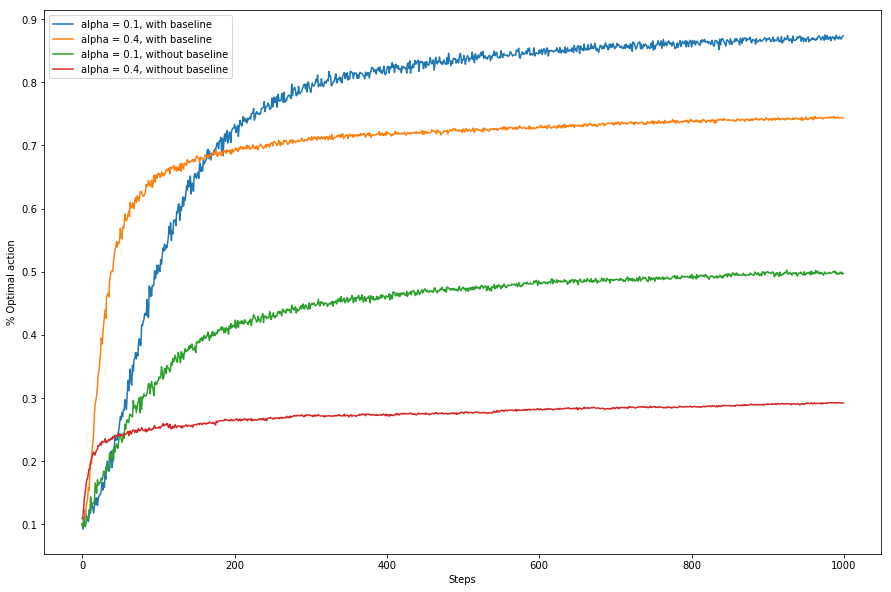

In [3]:
plt.figure(figsize=(15, 10))
plt.plot(results_b1[:,:,1].mean(axis=0), label='alpha = 0.1, with baseline')
plt.plot(results_b2[:,:,1].mean(axis=0), label='alpha = 0.4, with baseline')
plt.plot(results_b3[:,:,1].mean(axis=0), label='alpha = 0.1, without baseline')
plt.plot(results_b4[:,:,1].mean(axis=0), label='alpha = 0.4, without baseline')

plt.xlabel('Steps')
plt.ylabel('% Optimal action')
plt.legend()